# Homework 02. Linear Programming.

MSCA 32013 Optimization and Simulation Methods. University of Chicago.

Group 7. Ben Ossyra, Peter Pezon. Yawen Zhang.

## 1 - Consider the following LP problem:

\begin{equation}
\max_{x}\ \ {x_2}\\
\mathrm{s.t.}
\left\{
\begin{aligned}
-x_1 + x_2 &\le 1 \\
-0.5x_1 + x_2 &\le 2 \\
x_1 + x_2 &\le 9 \\
0.5x_1 + x_2 &\le 6 \\
x_1 \ge 0, x_2 &\ge 0
\end{aligned}\right.
\end{equation}

### A. Use Julia's solver to find the solution.

In [1]:
using JuMP, GLPK

m = Model(GLPK.Optimizer)

#Declare Variables:
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

#Add constraints
@constraint(m, constraint_1, -x1 + x2 <= 1)
@constraint(m, constraint_2, -0.5*x1 + x2 <= 2)
@constraint(m, constraint_3, x1 + x2 <= 9)
@constraint(m, constraint_4, 0.5*x1 + x2 <= 6)

#Set the objective
@objective(m, Max, x2)

print(m)

In [2]:
# Solve the optimization problem
JuMP.optimize!(m)

# Print the objective value
println("Objective value: ", JuMP.objective_value(m))

# Print the optimal solutions obtained
println("x1 = ", JuMP.value(x1))  # => x1 = 1.0
println("x2 = ", JuMP.value(x2))  # => x2 = 0.0


Objective value: 4.0
x1 = 4.0
x2 = 4.0


### B. What is the value of the objective function evaluated at the optimal solution?

The value of the objecive function at the optimal solution is 4

### C. Draw the constraints and the objective function at the optimal level.

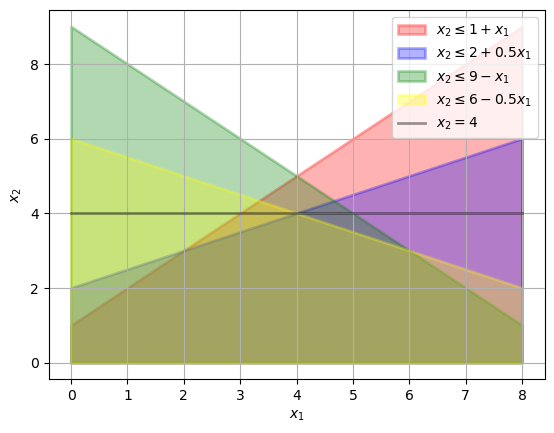

In [3]:
using PyPlot

x1 = collect(0:0.1:8)
x2a = ifelse.(1 .+ x1 .>=0, 1 .+ x1, NaN);
x2b = ifelse.(2 .+ 0.5.*x1 .>=0, 2 .+ 0.5.*x1, NaN);
x2c = ifelse.(9 .- x1 .>=0, 9 .- x1, NaN);
x2d = ifelse.(6 .- 0.5.*x1 .>=0, 6 .- 0.5.*x1, NaN);
x2e = 4 .+ x1 .* 0

fig, ax = subplots()

ax.fill_between(x1,x2a,color="red"  ,linewidth=2,label=L"x_{2} \leq 1 + x_{1}",alpha=0.3)
ax.fill_between(x1,x2b,color="blue" ,linewidth=2,label=L"x_{2} \leq 2 + 0.5x_{1}",alpha=0.3)
ax.fill_between(x1,x2c,color="green" ,linewidth=2,label=L"x_{2} \leq 9 - x_{1}",alpha=0.3)
ax.fill_between(x1,x2d,color="yellow" ,linewidth=2,label=L"x_{2} \leq 6 - 0.5x_{1}",alpha=0.3)

ax.plot(x1,x2e,color="black",linewidth=2,label=L"x_{2} = 4",alpha=0.4)


ax.set_xlabel(L"x_{1}");
ax.set_ylabel(L"x_{2}");
ax.legend(loc="upper right");
ax.grid("on");

### D. Justify the optimal solution

This problem asks us to maximize the value of x2 so any value of x1 will be acceptable. All we have to do is look at the polyedron (the overlap of all the areas) and find the point where x2 is the highest. You can see this occurs when x2 is 4 and x1 is 4.

## 2 - Consider the following LP problem:

\begin{equation}
\max_{x}\ \ {6x_1 + 4 {x_2}}\\
\mathrm{s.t.}
\left\{
\begin{aligned}
2x_1 + 3x_2 &\le 9 \\
x_1 &\le 3 \\
x_2 &\le 2 \\
x_1 \ge 0, x_2 &\ge 0
\end{aligned}\right.
\end{equation}

### A. Use Julia's solver to find the solution.

In [4]:
m = Model(GLPK.Optimizer)

#Declare Variables:
@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

#Add constraints
@constraint(m, constraint_1, 2*x1 + 3*x2 <= 9)
@constraint(m, constraint_2, x1 <= 3)
@constraint(m, constraint_3, x2 <= 2)

#Set the objective
@objective(m, Max, 6*x1 + 4*x2)

print(m)

In [5]:
# Solve the optimization problem
JuMP.optimize!(m)

# Print the objective value
println("Objective value: ", JuMP.objective_value(m))

# Print the optimal solutions obtained
println("x1 = ", JuMP.value(x1))  # => x1 = 1.0
println("x2 = ", JuMP.value(x2))  # => x2 = 0.0

Objective value: 22.0
x1 = 3.0
x2 = 1.0


### B. What is the value of the objective function evaluated at the optimal solution?

The value of the objecive function at the optimal solution is 22

### C. Draw the constraints and the objective function at the optimal level.

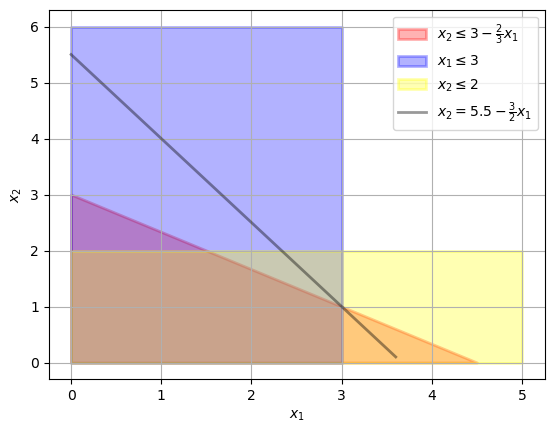

In [6]:
figure(figsize = (20, 6), dpi = 80)

x1 = collect(0:0.1:5)
x2 = collect(0:0.1:6)
x2a = ifelse.(3 .- (2/3) .* x1 .>=0, 3 .- (2/3) .* x1, NaN);
x1a = ifelse.(3 .- x2.* 0 .>=0, 3 .- x2.* 0, NaN);
x2c = ifelse.(2 .- x1.* 0 .>=0, 2 .- x1.* 0, NaN);
x2d = ifelse.((11/2) .- (3/2) .* x1 .>=0, (11/2) .- (3/2) .* x1, NaN);

fig, ax = subplots()

ax.fill_between(x1,x2a,color="red"  ,linewidth=2,label=L"x_{2} \leq 3 - \frac{2}{3}x_{1}",alpha=0.3)
ax.fill_betweenx(x2,0,x1a,color="blue" ,linewidth=2,label=L"x_{1} \leq 3",alpha=0.3)
ax.fill_between(x1,x2c,color="yellow" ,linewidth=2,label=L"x_{2} \leq 2",alpha=0.3)


ax.plot(x1,x2d,color="black",linewidth=2,label=L"x_{2} = 5.5 - \frac{3}{2}x_{1}",alpha=0.4)

ax.set_xlabel(L"x_{1}");
ax.set_ylabel(L"x_{2}");
ax.legend(loc="upper right");
ax.grid("on");


### D. Justify the Optimal Solution

There are four corners to the polyedron. Possible coordinates are (0,2), (1.5,2), (3,1), (3,0). Right off the bat, we can eliminate (0,2) and (3,0) because the objective function is an addition problem with all positive values. That leave us with two options to test: (1.5,2) and (3,1).
<br>
<br>
Objective function: $6x_1 + 4x_2$
<br>
<br>
Option 1:  
$x_1 = 1.5$  
$x_2 = 2$  
$6 * 1.5 + 4 * 2 = 17$
<br>
<br>
Option 2:  
$x_1 = 3$  
$x_2 = 1$  
$6 * 3 + 4 * 1 = 22$
<br>
<br>
Option 2 mamizes the objective function, which matches the solution the Julia solver gave us